In [1]:
import yfinance as yf

df= yf.download("TCS.NS", start="2021-07-01", end="2022-01-28")
import pandas as pd
if isinstance(df.columns, pd.MultiIndex):
    df.columns = df.columns.get_level_values(0)
df.columns.name = None 
dataset=df.drop(columns=['Volume'])
dataset

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open
Date,,,,
2021-07-01,3180.318604,3199.829761,3171.610058,3196.022706
2021-07-02,3165.042480,3178.605113,3136.251629,3170.324815
2021-07-05,3160.807373,3211.250851,3142.723862,3180.794412
2021-07-06,3104.938477,3167.469299,3099.037589,3153.192845
2021-07-07,3116.978271,3124.354440,3085.237094,3117.025906
...,...,...,...,...
2022-01-20,3663.347900,3752.812216,3648.461060,3743.238716
2022-01-21,3670.002197,3687.282416,3610.263635,3644.632416
2022-01-24,3610.502686,3685.463017,3580.585492,3676.224682


In [2]:
column='Close'

In [3]:
from sklearn.preprocessing import MinMaxScaler
Ms=MinMaxScaler()
data1=Ms.fit_transform(dataset[[column]])
print('Len:',data1.shape)

Len: (144, 1)


In [4]:
len(data1)

144

In [5]:
training_size=round(len(data1)* 0.85)
print(training_size)
x_train=data1[:training_size]
x_test=data1[training_size:]
print("x_train length:",x_train.shape)
print("x_test length:",x_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("x_train length:",y_train.shape)
print("x_test length:",y_test.shape)

122
x_train length: (122, 1)
x_test length: (22, 1)
x_train length: (122, 1)
x_test length: (22, 1)


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.metrics import mean_squared_error
orders=[(0,0,0),(0,0,1),(2,0,1),(1,1,1)]
from statsmodels.tsa.statespace.sarimax import SARIMAX
for i in orders:
    model=SARIMAX(x_train, order=i, seasonal_order=(0,0,0,12))
    model_fit=model.fit()
    #make prediction
    y_pred=model_fit.predict(len(x_train), len(data1)-1)
    from stockFunctions import rmsemape
    print("Order={}". format(i))
    rmsemape(y_test, y_pred)
    print('*****************')

Order=(0, 0, 0)
RMSE-Testset: 0.7963457872976075
maPe-Testset: 1.0
*****************
Order=(0, 0, 1)
RMSE-Testset: 0.7874733468589264
maPe-Testset: 0.9765646713211809
*****************
Order=(2, 0, 1)
RMSE-Testset: 0.2380400366124767
maPe-Testset: 0.2460795846478935
*****************
Order=(1, 1, 1)
RMSE-Testset: 0.19853144126984687
maPe-Testset: 0.20114841529215566
*****************


In [8]:
len(y_pred)

22

In [9]:
order=(1,1,1)
model=SARIMAX(x_train, order=order, seasonal_order=(0,0,0,12))
model_fit=model.fit()
#make prediction
y_pred=model_fit.predict(len(x_train), len(data1)-1)

mse=mean_squared_error(y_test, y_pred, squared=False)
from stockFunctions import rmsemape
print("Order={}".format(order))
rmsemape(y_test,y_pred)
print("************")

Order=(1, 1, 1)
RMSE-Testset: 0.19853144126984687
maPe-Testset: 0.20114841529215566
************


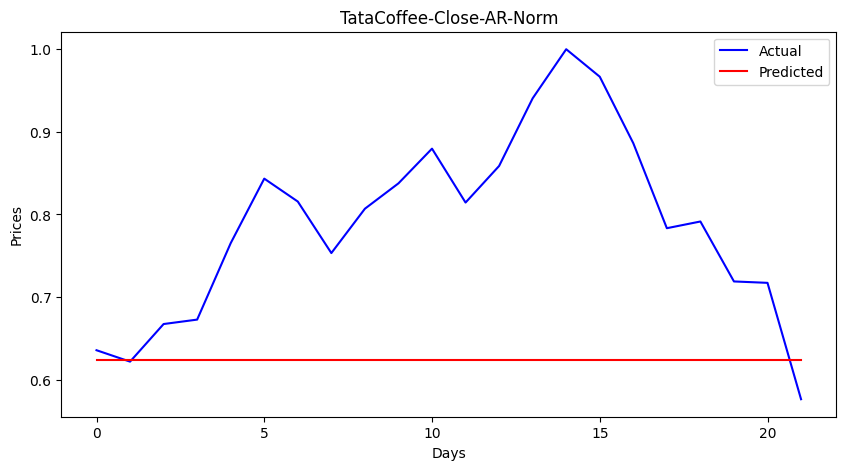

In [10]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [11]:
len(data1)

144

In [12]:
y_test

array([[0.63556506],
       [0.62175008],
       [0.66727463],
       [0.67263818],
       [0.76520441],
       [0.84331414],
       [0.81556744],
       [0.75319605],
       [0.80688193],
       [0.83760153],
       [0.8796299 ],
       [0.81434338],
       [0.85864386],
       [0.94054284],
       [1.        ],
       [0.96671582],
       [0.88619131],
       [0.78330183],
       [0.79141938],
       [0.71883612],
       [0.71714298],
       [0.57623923]])

In [13]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])

In [14]:
aTestNormTable

,Close
0,0.635565
1,0.62175
2,0.667275
3,0.672638
4,0.765204
5,0.843314
6,0.815567
7,0.753196
8,0.806882
9,0.837602


In [15]:
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_ori

array([[3542.24194336],
       [3530.91723633],
       [3568.2355957 ],
       [3572.63232422],
       [3648.51269531],
       [3712.54248047],
       [3689.79736328],
       [3638.66894531],
       [3682.67749023],
       [3707.85961914],
       [3742.31201172],
       [3688.79394531],
       [3725.10888672],
       [3792.24487305],
       [3840.984375  ],
       [3813.69995117],
       [3747.69067383],
       [3663.34790039],
       [3670.00219727],
       [3610.50268555],
       [3609.11474609],
       [3493.61010742]])

In [16]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])
actual_stock_price_test_oriA

,Close
0,3542.241943
1,3530.917236
2,3568.235596
3,3572.632324
4,3648.512695
5,3712.54248
6,3689.797363
7,3638.668945
8,3682.67749
9,3707.859619


In [17]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [18]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

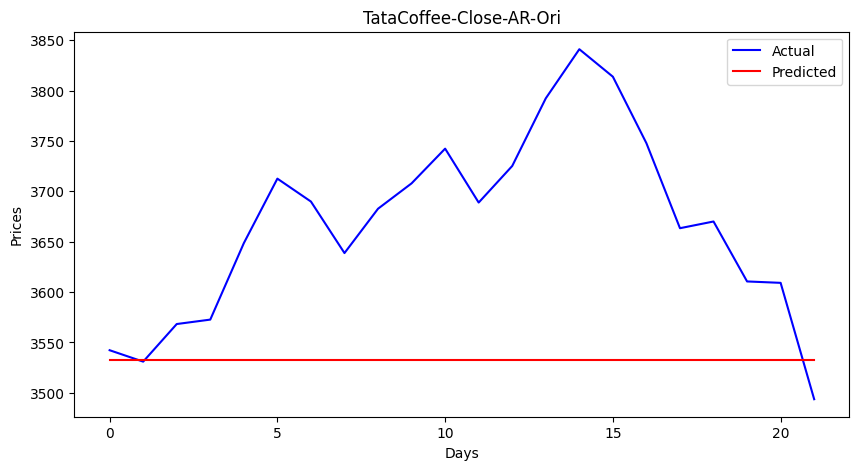

In [19]:
from stockFunctions import conversionSingle
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [20]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 162.74445254530184
maPe-Testset: 0.03741184871010182


In [21]:
forecast=model_fit.predict(len(data1),len(data1)+5)

In [22]:
forecast

array([0.62338267, 0.62338267, 0.62338267, 0.62338267, 0.62338267,
       0.62338267])

In [23]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,['Closefore'])
forecast_stock_price_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_oriF=conversionSingle(forecast_stock_price_ori,['Closefore'])
forecast_stock_price_oriF

,Closefore
0,3532.25554
1,3532.25554
2,3532.25554
3,3532.25554
4,3532.25554
5,3532.25554


In [24]:
#forecast_stock_price_test_oriF.to_csv("CloseAR.csv",index=False)